## DExB2 Class Test replacement

In [1]:
# Analysis modules - make sure you run this first to import all the modules you'll need
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols

warnings.filterwarnings("ignore")

This project has been looking for genetic material to enhance rice yields under drought. RNASeq data has been generated from several tissues for cultivated rice and drought-tolerant wild varieties.  

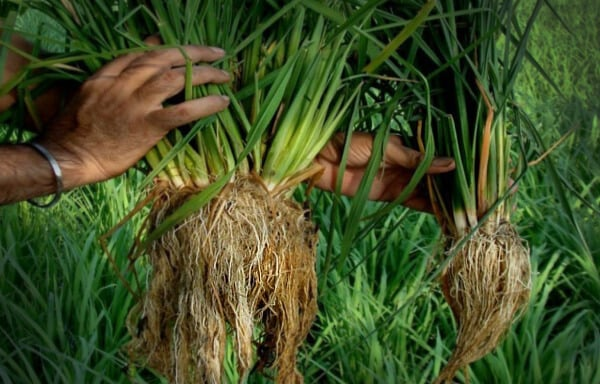

The raw expression data is here:  
        
        Cult_1.sf
        Cult_2.sf
        Cult_3.sf
        Wild_1.sf
        Wild_2.sf
        Wild_3.sf
        
The key columns are the gene name and the Transcripts per Million reads (TPM)
The other columns and the raw number of reads mapping to each gene (NumReads), the Length of the gene, and the Effective Length (takes into account all factors being modeled that will effect the probability of sampling fragments from this transcript, including the fragment length distribution and sequence-specific and gc-fragment bias)

The annotation is here:

        Rice_annot.xlsx
        
        

#### Read the RNASeq data in 

Set the index as the gene name using:

    index_col=0
    

<div class = "alert alert-danger">
Q1 How many data rows are there in the third replicate of the wild rice?  (1 mark)
 
    
    a 8723    
    b 11296  
    c 13409   
    d 22467   
    Xe 45072    
    
Enter your answer on LEARN

<div class = "alert alert-danger">
Q2 What is the maximum TPM for any gene in rep 1 of the Cultivated Rice?  (1 mark)

    a 3427.257  
    Xb 7730.83 
    c 21684.946  
    d 25196.333  
    e 41984.324  
    
Enter your answer on LEARN

<div class = "alert alert-danger">
Q3 What is name of the gene with the highest TPM in  Cultivated Rice rep 1? (1 mark)

    a Scaffolds_1827_0.16_mRNA_1 
    b Scaffolds_1075_2.1_mRNA_1
    Xc Scaffolds_1400_0.36_mRNA_1  
    d Scaffolds_1745_0.15_mRNA_1  
    e Scaffolds_1853_0.18_mRNA_1  
    
Enter your answer on LEARN

<div class = "alert alert-danger">
Q4 Plot TPM by NumReads for Cultivated Rice rep 1 as lmplot and upload the plot to LEARN (2 marks)

<div class = "alert alert-danger">
Q5 Fit a model for the line in this plot using ols().  Which of these statements is true?  (1 mark)

    a NumReads drives TPM
    b The intercept is significantly different from zero
    Xc The slope has a coefficient of 0.27
    d The P-value for NumReads supports a non-zero intercept
    e The t statistic for the slope shows a positive realtionship
    
Enter your answer on LEARN  

<div class = "alert alert-danger">
Q6 What is name of the gene with the highest TPM in  Cultivated Rice rep 1? (1 mark)

    a Scaffolds_1827_0.16_mRNA_1 
    b Scaffolds_1075_2.1_mRNA_1
    Xc Scaffolds_1400_0.36_mRNA_1  
    d Scaffolds_1745_0.15_mRNA_1  
    e Scaffolds_1853_0.18_mRNA_1  
    
Enter your answer on LEARN

For each dataframe remove all but the gene name and the TPM column.  Use

    df.drop()

Concat the dataframes.  Use  

    pd.concat  with keys=['cult_1', 'cult_2', 'cult_3', 'wild_1', 'wild_2', 'wild_3']
    
This gives nested column headers.  Reset to the top level using:  

    df.columns = df.columns.get_level_values(0)
    
Sort by the values for replicate 1 of the cultivate rice.  Use:

    df.sort_values()

<div class = "alert alert-danger">
Q7 What is the TPM in wild rice replicate 1 for the gene most highly expressed in cuiltvated rice replicate 1?  (1 mark)

    a 785.21 
    b 9071.88  
    c 28106.24  
    Xd 5026.12  
    e 58203.12 
    
Enter your answer on LEARN


Read in the annotations.  The file has no header so give the columns the names 

    ['Annotation', 'Gene_model']


Find the row where 'Gene_model' matches the name of the gene most highly expressed gene in cultivated rice replicate 1.  Use:

    df.loc

<div class = "alert alert-danger">
Q8 What is the anotation for the most highly expressed gene in cultivate rice replicate 1? (1 mark)

    a External stimuli response.salinity 
    b Solute transport.primary  
    c Cell wall organisation 
    d Protein homeostasis 
    Xe Tonoplast intrinsic protein  
    
Enter your answer on LEARN


Plot a heatmap of the TPM data susing sns.heatmap()  


To remove the influence of highly expressed outliers use 

    robust=True
    

<div class = "alert alert-danger">
Q9 upload the heatmap to LEARN (2 marks)

Reset the index using:
    
    df.reset_index(inplace = True) 

Re-arrange the dataframe to long form using

    pd.melt
    
var name should be 'Sample'
value name should be 'TPM'
value vars will be ['cult_1', 'cult_2', 'cult_3', 'wild_1', 'wild_2', 'wild_3']
 
    
The melted datafraame should look like the image below

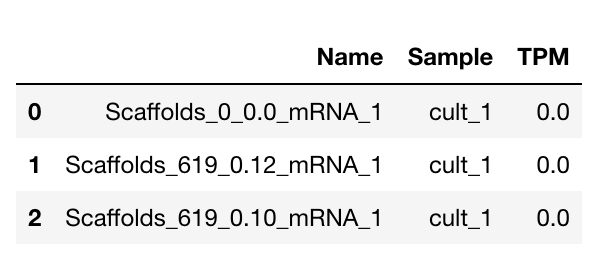

Sort the dataframe by TPM.  Use:
    
    df.sort_values()

<div class = "alert alert-danger">
Q10 Which of the samples has the maximum TPM overall? (1 mark)

    Xa Cultivated 1   
    b Cultivated 2 
    c Cultivated 3   
    d Wild 1    
    e Wild 2  
    f Wild 3. 
    
Enter your answer on LEARN

Split the sample column with rice type and replicate into two columns.  Use:  
    
    df[['A', 'B']] = df['AB'].str.split(' ', n=1, expand=True)
    
Drop the original 'Sample' column

Use multiple regression analysis with two categorical explanatory variables and a numerical response variable to look at the effect of Rice variety and Replicate on TPM.  

Use the formula 'TPM ~ Rice_var + Rep'


<div class = "alert alert-danger">
Q11 What is the P value for the effect of Rice variety? (1 mark)

    Xa 0.78 
    b 0.023 
    c 0.001 
    d 0.43 
    e 0.037
    
Enter your answer on LEARN

These genes are involved in salt tolerance.  Are salt tolerance genes significantly differentailly expressed between wild and cultivated rice?

    ['Scaffolds_120_4.20_mRNA_1',
     'Scaffolds_1226_3.13_mRNA_1',
     'Scaffolds_1308_3.10_mRNA_1',
     'Scaffolds_1516_1.16_mRNA_1',
     'Scaffolds_2846_0.55_mRNA_1',
     'Scaffolds_486_2.19_mRNA_1',
     'Scaffolds_585_0.35_mRNA_1']
 
Subset the dataframe using
 
      df[df['Column'].isin([list])]
      
 
     

Plot a boxplot of TPM as responce variable, by Rice Variety, coloured by Replicate

<div class = "alert alert-danger">
Q12 upload the boxplot to LEARN (2 marks)